## 1. What regularization techniques were mentioned in that Jupyter notebook?

1. Reducing the size of the model (number of layers and number of units per layer)

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

changed_model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2. Adding cost to the weights of the model (L1 Regularization and L2 Regularization)

In [2]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

3. Randomly dropping out a number of output features of the layer during training (Dropout)

In [3]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

## 2. Dataset Generation

1. Import training dataset
2. Separate the "0"s and choose 6,000 images at random
3. Separate the "1"s and choose 6,000 images at random
4. Combine the "0"s and "1"s to make 6,000 pairs
5. Repeat for other labels/targets
6. Concatenate all the pairs and shuffle for a new dataset of 30,000
---
7. Import training dataset and repeat process for a new dataset of 5,000

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from numpy.random import default_rng
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist


rng = default_rng()

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pick 6000 random "0"s
# Pick 6000 random "1"s
# Average "0"s and "1"s to make new "0"s label

# Train Data

train_images_0 = (train_images[rng.choice(np.where(train_labels == 0)[0],6000)] 
                  + train_images[rng.choice(np.where(train_labels == 1)[0],6000)])/2

train_images_1 = (train_images[rng.choice(np.where(train_labels == 2)[0],6000)] 
                  + train_images[rng.choice(np.where(train_labels == 3)[0],6000)])/2

train_images_2 = (train_images[rng.choice(np.where(train_labels == 4)[0],6000)] 
                  + train_images[rng.choice(np.where(train_labels == 5)[0],6000)])/2

train_images_3 = (train_images[rng.choice(np.where(train_labels == 6)[0],6000)] 
                  + train_images[rng.choice(np.where(train_labels == 7)[0],6000)])/2

train_images_4 = (train_images[rng.choice(np.where(train_labels == 8)[0],6000)] 
                  + train_images[rng.choice(np.where(train_labels == 9)[0],6000)])/2

train_images_new = np.concatenate([train_images_0,train_images_1,train_images_2,train_images_3,train_images_4])

train_labels_new = np.concatenate([np.full((6000),0), np.full((6000),1), np.full((6000),2), np.full((6000),3), np.full((6000),4)])

# Test Data

test_images_0 = (test_images[rng.choice(np.where(test_labels == 0)[0],1000)] 
                  + test_images[rng.choice(np.where(test_labels == 1)[0],1000)])/2

test_images_1 = (test_images[rng.choice(np.where(test_labels == 2)[0],1000)] 
                  + test_images[rng.choice(np.where(test_labels == 3)[0],1000)])/2

test_images_2 = (test_images[rng.choice(np.where(test_labels == 4)[0],1000)] 
                  + test_images[rng.choice(np.where(test_labels == 5)[0],1000)])/2

test_images_3 = (test_images[rng.choice(np.where(test_labels == 6)[0],1000)] 
                  + test_images[rng.choice(np.where(test_labels == 7)[0],1000)])/2

test_images_4 = (test_images[rng.choice(np.where(test_labels == 8)[0],1000)] 
                  + test_images[rng.choice(np.where(test_labels == 9)[0],1000)])/2

test_images_new = np.concatenate([test_images_0,test_images_1,test_images_2,test_images_3,test_images_4])

test_labels_new = np.concatenate([np.full((1000),0), np.full((1000),1), np.full((1000),2), np.full((1000),3), np.full((1000),4)])

# Shuffle

temp = list(zip(train_images_new, train_labels_new))
rng.shuffle(temp)
train_images_new, train_labels_new = zip(*temp)

train_images_new = np.asarray(train_images_new) 
train_labels_new = np.asarray(train_labels_new) 

temp = list(zip(test_images_new, test_labels_new))
rng.shuffle(temp)
test_images_new, test_labels_new = zip(*temp)

test_images_new = np.asarray(test_images_new)
test_labels_new = np.asarray(test_labels_new)



### Training Data

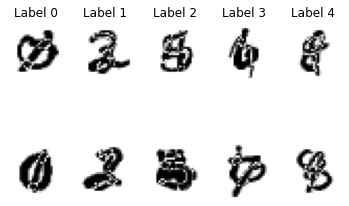

In [2]:
fig, axs = plt.subplots(2, 5)



axs[0, 0].imshow(train_images_new[rng.choice(np.where(train_labels_new == 0)[0])], cmap=plt.cm.binary)
axs[0, 0].axis('off')
axs[1, 0].imshow(train_images_new[rng.choice(np.where(train_labels_new == 0)[0])], cmap=plt.cm.binary)
axs[1, 0].axis('off')

axs[0, 1].imshow(train_images_new[rng.choice(np.where(train_labels_new == 1)[0])], cmap=plt.cm.binary)
axs[0, 1].axis('off')
axs[1, 1].imshow(train_images_new[rng.choice(np.where(train_labels_new == 1)[0])], cmap=plt.cm.binary)
axs[1, 1].axis('off')

axs[0, 2].imshow(train_images_new[rng.choice(np.where(train_labels_new == 2)[0])], cmap=plt.cm.binary)
axs[0, 2].axis('off')
axs[1, 2].imshow(train_images_new[rng.choice(np.where(train_labels_new == 2)[0])], cmap=plt.cm.binary)
axs[1, 2].axis('off')

axs[0, 3].imshow(train_images_new[rng.choice(np.where(train_labels_new == 3)[0])], cmap=plt.cm.binary)
axs[0, 3].axis('off')
axs[1, 3].imshow(train_images_new[rng.choice(np.where(train_labels_new == 3)[0])], cmap=plt.cm.binary)
axs[1, 3].axis('off')

axs[0, 4].imshow(train_images_new[rng.choice(np.where(train_labels_new == 4)[0])], cmap=plt.cm.binary)
axs[0, 4].axis('off')
axs[1, 4].imshow(train_images_new[rng.choice(np.where(train_labels_new == 4)[0])], cmap=plt.cm.binary)
axs[1, 4].axis('off')

axs[0, 0].title.set_text('Label 0')
axs[0, 1].title.set_text('Label 1')
axs[0, 2].title.set_text('Label 2')
axs[0, 3].title.set_text('Label 3')
axs[0, 4].title.set_text('Label 4')

plt.show()

### Test Data

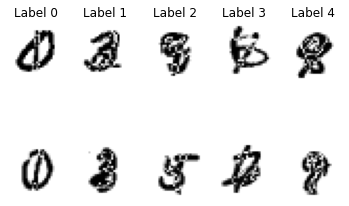

In [3]:
fig, axs = plt.subplots(2, 5)

axs[0, 0].imshow(test_images_new[rng.choice(np.where(test_labels_new == 0)[0])], cmap=plt.cm.binary)
axs[0, 0].axis('off')
axs[1, 0].imshow(test_images_new[rng.choice(np.where(test_labels_new == 0)[0])], cmap=plt.cm.binary)
axs[1, 0].axis('off')

axs[0, 1].imshow(test_images_new[rng.choice(np.where(test_labels_new == 1)[0])], cmap=plt.cm.binary)
axs[0, 1].axis('off')
axs[1, 1].imshow(test_images_new[rng.choice(np.where(test_labels_new == 1)[0])], cmap=plt.cm.binary)
axs[1, 1].axis('off')

axs[0, 2].imshow(test_images_new[rng.choice(np.where(test_labels_new == 2)[0])], cmap=plt.cm.binary)
axs[0, 2].axis('off')
axs[1, 2].imshow(test_images_new[rng.choice(np.where(test_labels_new == 2)[0])], cmap=plt.cm.binary)
axs[1, 2].axis('off')

axs[0, 3].imshow(test_images_new[rng.choice(np.where(test_labels_new == 3)[0])], cmap=plt.cm.binary)
axs[0, 3].axis('off')
axs[1, 3].imshow(test_images_new[rng.choice(np.where(test_labels_new == 3)[0])], cmap=plt.cm.binary)
axs[1, 3].axis('off')

axs[0, 4].imshow(test_images_new[rng.choice(np.where(test_labels_new == 4)[0])], cmap=plt.cm.binary)
axs[0, 4].axis('off')
axs[1, 4].imshow(test_images_new[rng.choice(np.where(test_labels_new == 4)[0])], cmap=plt.cm.binary)
axs[1, 4].axis('off')

axs[0, 0].title.set_text('Label 0')
axs[0, 1].title.set_text('Label 1')
axs[0, 2].title.set_text('Label 2')
axs[0, 3].title.set_text('Label 3')
axs[0, 4].title.set_text('Label 4')

plt.show()

## 3. Model Design

In [4]:
train_images_new = train_images_new.reshape((30000, 28 * 28))
train_images_new = train_images_new.astype("float32") / 255

test_images_new = test_images_new.reshape((5000, 28 * 28))
test_images_new = test_images_new.astype("float32") / 25

In [5]:
model = keras.Sequential([
    layers.Dense(156, activation="relu"),
    layers.Dense(156, activation="relu"), 
    layers.Dropout(0.5),  
    layers.Dense(5, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images_new, train_labels_new,
          epochs=45,
          batch_size=256,
          validation_split=0.2)


Epoch 1/45
94/94 [==============================] - 2s 6ms/step - loss: 0.5050 - accuracy: 0.8307 - val_loss: 0.2880 - val_accuracy: 0.8960
Epoch 2/45
94/94 [==============================] - 0s 4ms/step - loss: 0.2409 - accuracy: 0.9189 - val_loss: 0.1866 - val_accuracy: 0.9338
Epoch 3/45
94/94 [==============================] - 0s 4ms/step - loss: 0.1913 - accuracy: 0.9360 - val_loss: 0.1700 - val_accuracy: 0.9408
Epoch 4/45
94/94 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9452 - val_loss: 0.1821 - val_accuracy: 0.9348
Epoch 5/45
94/94 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.9560 - val_loss: 0.1345 - val_accuracy: 0.9558
Epoch 6/45
94/94 [==============================] - 0s 4ms/step - loss: 0.1088 - accuracy: 0.9632 - val_loss: 0.1355 - val_accuracy: 0.9543
Epoch 7/45
94/94 [==============================] - 0s 4ms/step - loss: 0.0922 - accuracy: 0.9692 - val_loss: 0.1090 - val_accuracy: 0.9603
Epoch 8/45
94/94 [==

### Training Performance

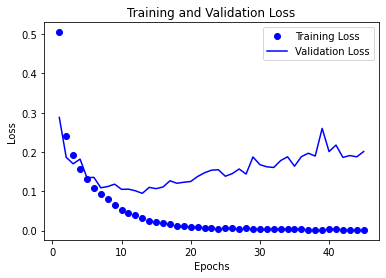

In [25]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

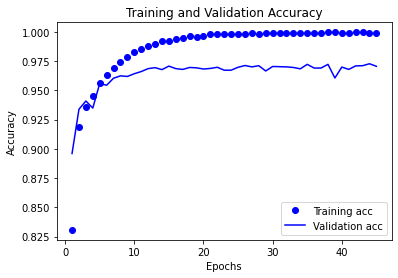

In [26]:
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Test Performance

In [27]:
model = keras.Sequential([
    layers.Dense(156, activation="relu"),
    layers.Dense(156, activation="relu"), 
    layers.Dropout(0.5),  
    layers.Dense(5, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images_new, train_labels_new,
          epochs=13,
          batch_size=256,
          verbose=0)

test_loss, test_acc = model.evaluate(test_images_new, test_labels_new)

157/157 [==============================] - 0s 2ms/step - loss: 1.2261 - accuracy: 0.9664


### Process of Optimization

We started with a model that was underfitting.

*   Training loss was decreasing
*   Beating the common-sense baseline

Thus, we focused on increasing model capacity, to get to the overfitting stage.

*   Increased the number of neurons per layer
*   Increased the number of layers in the model

We are now with a model that was overfitting.

*   Slightly reduced the capacity of of the model
*   Applied dropout layers
*   Early stoppage at well-fit

We are now with a final model

*   Train the final model with the entire dataset: training + validation


---

We saw improvements when using some of the regularization techniques. In particular, the dropout layers were effective in delaying and reducing the overfitting. The L1 and L2 regularization seemed to not have much effect on our model or harmed our loss values. Early stoppage was utilized to keep the model at a "well-fit" stage.